# Reddit Survey Lab

This lab includes the following for the provided Reddit Suvery:
1. EDA and Survey Data Cleanup
2. Graph of Pearson's Correlation Coefficient
3. Random Forest Model to predict Miliary Service as True/False.

Andrew Peabody apeab2@uis.edu

In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Import the Survey Data
df = pd.read_csv("RedditShortDemoSurvey-1-Cleaned.csv")

## Column name cleanup

In [3]:
list(df.columns.values)

['Entry Id',
 'Please indicate your gender.',
 'Please select the category that includes your age.',
 'What is your marital status?',
 'What best describes your employment status?',
 'Are you or have you ever been in military service?',
 'Do you currently have children under the age of 18 living in your household?',
 'What best describes your level of education?',
 'Treated country data',
 '(For U. S. redditors) In which state do you live?',
 'Which one of the following ranges includes your total yearly household income before taxes?',
 'treated subreddit data',
 'Are you a dog or a cat person?',
 'If you were a cheese, what cheese would you be?',
 'Unnamed: 14',
 'Unnamed: 15',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19']

In [4]:
#Rename Cells for easier addressing
df.rename(columns={'Entry Id': 'EntryId', 
                   'Please indicate your gender.': 'Gender',
                   'Please select the category that includes your age.': 'Age',
                   'What is your marital status?': 'MaritalStatus',
                   'What best describes your employment status?': 'EmploymentStatus',
                   'Are you or have you ever been in military service?': 'MilitaryService',
                   'Do you currently have children under the age of 18 living in your household?': 'Children',
                   'What best describes your level of education?': 'Education',
                   'Treated country data': 'Country',
                   '(For U. S. redditors) In which state do you live?': 'State',
                   'Which one of the following ranges includes your total yearly household income before taxes?': 'Income',
                   'treated subreddit data': 'Subreddit',
                   'Are you a dog or a cat person?': 'CatOrDog',
                   'If you were a cheese, what cheese would you be?': 'Cheese'
                  }, inplace=True)

#Drop misimports
df.drop(['Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19'], axis=1, inplace=True)

list(df.columns.values)

['EntryId',
 'Gender',
 'Age',
 'MaritalStatus',
 'EmploymentStatus',
 'MilitaryService',
 'Children',
 'Education',
 'Country',
 'State',
 'Income',
 'Subreddit',
 'CatOrDog',
 'Cheese']

## Raw Data exploration/verification

In [5]:
#Quick visual check of the data
df

,EntryId,Gender,Age,MaritalStatus,EmploymentStatus,MilitaryService,Children,Education,Country,State,Income,Subreddit,CatOrDog,Cheese
0,1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",getmotivated,none,none
1,2,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,none,none
2,3,Female,18-24,Blank,Freelance,none,No,Some college,United States,Virginia,"Under $20,000",snackexchange,none,none
3,4,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,United States,New York,"$150,000 or more",spacedicks,none,none
4,5,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,California,"$70,000 - $99,999",aww,none,none
5,6,Male,25-34,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,I like dogs.,Cheddar
6,7,Male,25-34,In a relationship,Employed full time,No,No,Some college,Germany,NaN,none,python,I like dogs.,Cheddar
7,8,Male,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",No,No,Bachelor's degree,United States,California,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American
8,9,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",todayilearned,I like cats.,Provolone
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,NaN,"$70,000 - $99,999",NaN,I like cats.,Munster


### EntryId exploration

In [6]:
df.EntryId.value_counts()

2047     1
15693    1
21824    1
23873    1
17730    1
19779    1
30020    1
32069    1
25926    1
27975    1
5448     1
7497     1
1354     1
3403     1
13644    1
9550     1
9518     1
11599    1
21856    1
23905    1
17762    1
19811    1
30052    1
32101    1
25958    1
28007    1
5480     1
7529     1
1386     1
3435     1
        ..
17085    1
19132    1
8849     1
14994    1
12947    1
2708     1
661      1
6806     1
4759     1
27288    1
25241    1
31386    1
29339    1
19100    1
17053    1
23198    1
21151    1
10928    1
8881     1
15026    1
12979    1
2740     1
693      1
6838     1
4791     1
27320    1
25273    1
31418    1
29371    1
2049     1
Name: EntryId, dtype: int64

In [7]:
df[df.EntryId.isnull()]

,EntryId,Gender,Age,MaritalStatus,EmploymentStatus,MilitaryService,Children,Education,Country,State,Income,Subreddit,CatOrDog,Cheese


In [8]:
df['EntryId'].describe()

count    32754.000000
mean     16378.561916
std       9456.272427
min          1.000000
25%       8189.250000
50%      16379.500000
75%      24567.750000
max      32756.000000
Name: EntryId, dtype: float64

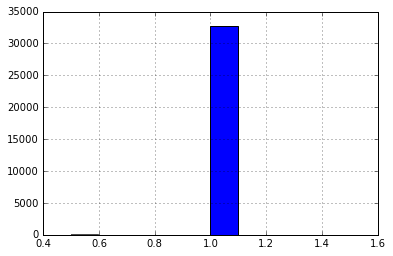

In [9]:
df.EntryId.value_counts().hist(bins=10)

### EntryId analysis 

1. categorical or continuous? continuous
2. missing values? none
3. if continuous, Min, Max, Mean, and Standard Deviation?
  - Min: 1
  - Max: 32756
  - Mean: 16378.561916
  - Std Dev: 9456.272427
4. histogram/graph? inline directly above

NOTE: this is a 1:1 UIQ, so no real value from a histogram/graph

### Gender exploration

In [10]:
df.Gender.value_counts()

Male      26418
Female     6135
None        201
Name: Gender, dtype: int64

In [11]:
df[df.Gender.isnull()]

,EntryId,Gender,Age,MaritalStatus,EmploymentStatus,MilitaryService,Children,Education,Country,State,Income,Subreddit,CatOrDog,Cheese


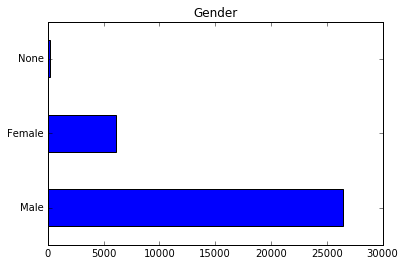

In [12]:
df.Gender.value_counts().plot(kind='barh',title="Gender")

### Gender analysis 

1. categorical or continuous? categorical ['None', 'Female', 'Male']
2. missing values? None ('None' is taken as a valid response in this case)
3. if continuous, Min, Max, Mean, and Standard Deviation?
4. histogram/graph? inline directly above

NOTE: Use of three valid values

### Age exploration

In [13]:
df.Age.value_counts()

18-24          15802
25-34          11575
Under 18        2330
35-44           2257
45-54            502
55-64            140
None              88
65 or Above       60
Name: Age, dtype: int64

In [14]:
df[df.Age.isnull()]

,EntryId,Gender,Age,MaritalStatus,EmploymentStatus,MilitaryService,Children,Education,Country,State,Income,Subreddit,CatOrDog,Cheese


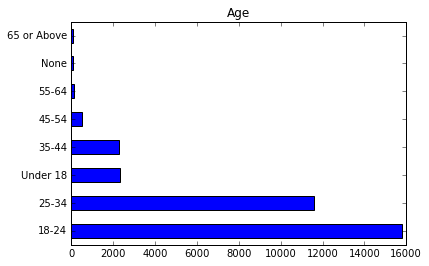

In [15]:
df.Age.value_counts().plot(kind='barh',title="Age")

### Age analysis 

1. categorical or continuous? categorical
2. missing values? none
3. if continuous, Min, Max, Mean, and Standard Deviation?
4. histograms? inline directly above

### Marital Status exploration

In [16]:
df.MaritalStatus.value_counts()

Single                                      10428
In a relationship                            9828
Forever Alone                                5850
Married/civil union/domestic partnership     5490
Engaged                                      1109
Widowed                                        44
Blank                                           5
Name: MaritalStatus, dtype: int64

In [17]:
df[df.MaritalStatus.isnull()]

,EntryId,Gender,Age,MaritalStatus,EmploymentStatus,MilitaryService,Children,Education,Country,State,Income,Subreddit,CatOrDog,Cheese


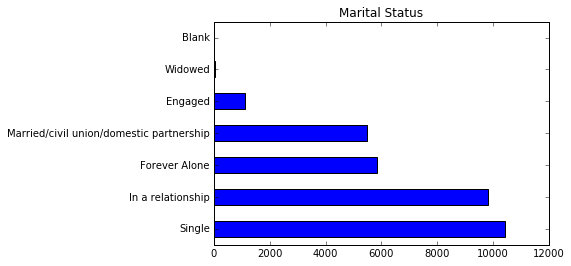

In [18]:
df.MaritalStatus.value_counts().plot(kind='barh',title="Marital Status")

### Marital Status analysis 

1. categorical or continuous? categorical
2. missing values? none
3. if continuous, Min, Max, Mean, and Standard Deviation?
4. histogram/graph? inline directly above

NOTE: A limited number of "blank" responses which will be considered valid.

### Employment Status exploration

In [19]:
df.EmploymentStatus.value_counts()

Employed full time                       14814
Student                                  12987
Not employed, but looking for work        2087
Freelance                                 1948
Not employed and not looking for work      682
None                                       151
Retired                                     85
Name: EmploymentStatus, dtype: int64

In [20]:
df[df.EmploymentStatus.isnull()]

,EntryId,Gender,Age,MaritalStatus,EmploymentStatus,MilitaryService,Children,Education,Country,State,Income,Subreddit,CatOrDog,Cheese


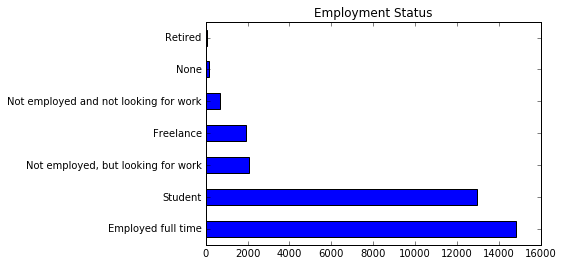

In [21]:
df.EmploymentStatus.value_counts().plot(kind='barh',title="Employment Status")

### Employment Status analysis 

1. categorical or continuous? categorical
2. missing values? none
3. if continuous, Min, Max, Mean, and Standard Deviation?
4. histogram/graph? inline directly above

### Military Service exploration

In [22]:
df.MilitaryService.value_counts()

No      30526
Yes      2223
none        5
Name: MilitaryService, dtype: int64

In [23]:
df[df.MilitaryService.isnull()]

,EntryId,Gender,Age,MaritalStatus,EmploymentStatus,MilitaryService,Children,Education,Country,State,Income,Subreddit,CatOrDog,Cheese


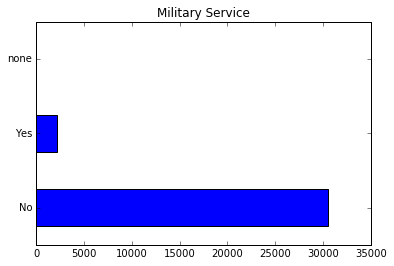

In [24]:
df.MilitaryService.value_counts().plot(kind='barh',title="Military Service")

### Military Service analysis 

1. categorical or continuous? categorical 
2. missing values? none
3. if continuous, Min, Max, Mean, and Standard Deviation?
4. histogram/graph? inline directly above

### Children exploration

In [25]:
df.Children.value_counts()

No      27488
Yes      5047
None      219
Name: Children, dtype: int64

In [26]:
df[df.Children.isnull()]

,EntryId,Gender,Age,MaritalStatus,EmploymentStatus,MilitaryService,Children,Education,Country,State,Income,Subreddit,CatOrDog,Cheese


In [27]:
df['Children'].describe()

count     32754
unique        3
top          No
freq      27488
Name: Children, dtype: object

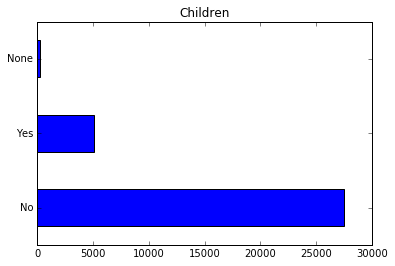

In [28]:
df.Children.value_counts().plot(kind='barh',title="Children")

### Children analysis 

1. categorical or continuous? categorical
2. missing values? no
3. if continuous, Min, Max, Mean, and Standard Deviation?
4. histogram/graph? inline directly above

### Education exploration

In [29]:
df.Education.value_counts()

Bachelor's degree                     11046
Some college                           9600
Graduate or professional degree        4722
High school graduate or equivalent     3272
Some high school                       1924
Associate degree                       1411
Trade or Vocational degree              635
None                                    144
Name: Education, dtype: int64

In [30]:
df[df.Education.isnull()]

,EntryId,Gender,Age,MaritalStatus,EmploymentStatus,MilitaryService,Children,Education,Country,State,Income,Subreddit,CatOrDog,Cheese


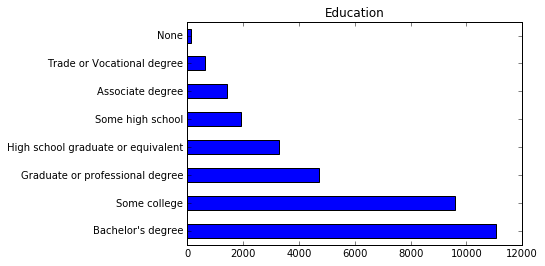

In [31]:
df.Education.value_counts().plot(kind='barh',title="Education")

### Education analysis 

1. categorical or continuous? categorical
2. missing values? no
3. if continuous, Min, Max, Mean, and Standard Deviation?
4. histogram/graph? inline directly above

### Country exploration

In [32]:
df.Country.value_counts()

United States                       20967
Canada                               2888
United Kingdom                       1782
Australia                            1051
Germany                               407
New Zealand                           315
Sweden                                309
Norway                                288
Ireland                               242
Finland                               188
Denmark                               182
none                                  177
India                                 154
France                                142
The Netherlands                       141
Netherlands                           134
Belgium                               119
Poland                                112
Brazil                                111
Mexico                                108
Spain                                 100
canada                                 97
Portugal                               87
Switzerland                       

In [33]:
df[df.Country.isnull()]

,EntryId,Gender,Age,MaritalStatus,EmploymentStatus,MilitaryService,Children,Education,Country,State,Income,Subreddit,CatOrDog,Cheese


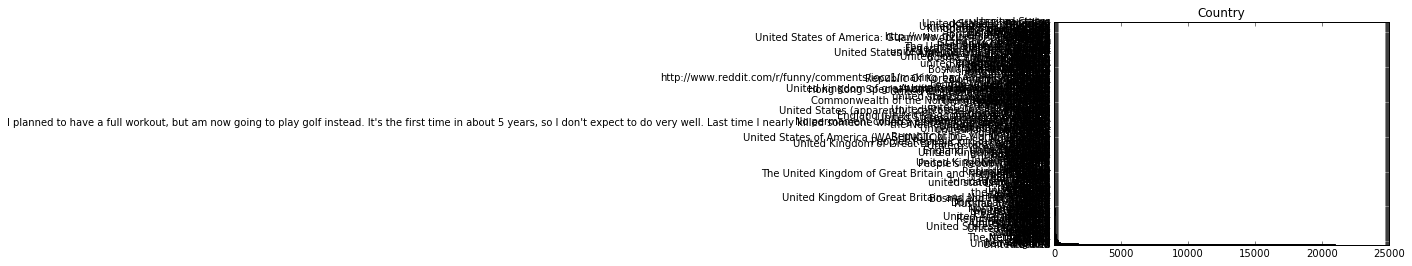

In [34]:
df.Country.value_counts().plot(kind='barh',title="Country")

### Country analysis 

1. categorical or continuous? categorical
2. missing values? no, but many of the values are suspect quality...
3. if continuous, Min, Max, Mean, and Standard Deviation?
4. histogram/graph? inline directly above

NOTE: Some limited invalid ("non-standard") country names

### State exploration

In [35]:
df.State.value_counts()

California        3401
Texas             1541
New York          1418
Illinois           976
Washington         910
Florida            882
Pennsylvania       823
Massachusetts      796
Virginia           729
Ohio               654
New Jersey         552
Michigan           545
North Carolina     511
Maryland           508
Georgia            501
Oregon             466
Minnesota          464
Wisconsin          415
Colorado           410
Arizona            364
Missouri           340
Indiana            313
Connecticut        303
Tennessee          292
Louisiana          196
Utah               181
Kansas             174
Iowa               170
South Carolina     169
Kentucky           168
Alabama            166
Oklahoma           150
Nebraska           118
New Hampshire      111
Nevada             110
Arkansas            99
Washington, DC      98
Maine               85
New Mexico          83
Idaho               78
Alaska              75
Vermont             74
Rhode Island        72
Hawaii     

In [36]:
df[df.State.isnull()]

,EntryId,Gender,Age,MaritalStatus,EmploymentStatus,MilitaryService,Children,Education,Country,State,Income,Subreddit,CatOrDog,Cheese
6,7,Male,25-34,In a relationship,Employed full time,No,No,Some college,Germany,NaN,none,python,I like dogs.,Cheddar
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,NaN,"$70,000 - $99,999",NaN,I like cats.,Munster
13,14,Male,18-24,Forever Alone,Student,No,No,Some college,Romania,NaN,"Under $20,000",NaN,I like cats.,Swiss
17,18,Male,35-44,Single,Not employed and not looking for work,No,No,Graduate or professional degree,United Kingdom,NaN,"Under $20,000",aww,I like cats.,Goat
18,19,Male,25-34,Single,Employed full time,No,No,Graduate or professional degree,Republic of Ireland,NaN,"$40,000 - $49,999",askscience,I like cats.,Feta
20,21,Male,45-54,Married/civil union/domestic partnership,Freelance,No,Yes,High school graduate or equivalent,France,NaN,"Under $20,000",motorcycles,I like dogs.,Cheddar
21,22,Male,Under 18,Forever Alone,Student,No,Yes,High school graduate or equivalent,United Kingdom,NaN,"$100,000 - $149,999",anarchism,I like turtles.,Swiss
22,23,Male,18-24,Single,Employed full time,No,No,High school graduate or equivalent,Germany,NaN,"$100,000 - $149,999",truereddit,I like cats.,Other
23,24,Male,55-64,Forever Alone,Employed full time,Yes,No,Trade or Vocational degree,Canada,NaN,"$40,000 - $49,999",atheism,I like cats.,Feta
24,25,Male,45-54,Married/civil union/domestic partnership,Freelance,No,No,Some college,Germany,NaN,"$150,000 or more",new,I like turtles.,Other


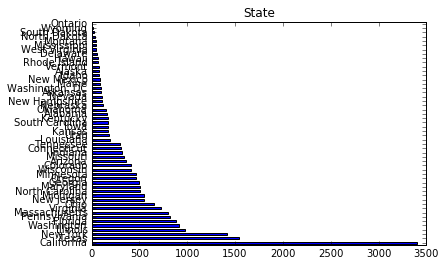

In [37]:
df.State.value_counts().plot(kind='barh',title="State")

### State analysis 

1. categorical or continuous? categorical
2. missing values? yes, 11908 rows
3. if continuous, Min, Max, Mean, and Standard Deviation?
4. histogram/graph? inline directly above

NOTE: States not present for non-USA individuals

### Income exploration

In [38]:
df.Income.value_counts()

Under $20,000          7892
$50,000 - $69,999      4133
$70,000 - $99,999      4101
$100,000 - $149,999    3522
$20,000 - $29,999      3206
$30,000 - $39,999      2904
$150,000 or more       2695
$40,000 - $49,999      2686
none                   1615
Name: Income, dtype: int64

In [39]:
df[df.Income.isnull()]

,EntryId,Gender,Age,MaritalStatus,EmploymentStatus,MilitaryService,Children,Education,Country,State,Income,Subreddit,CatOrDog,Cheese


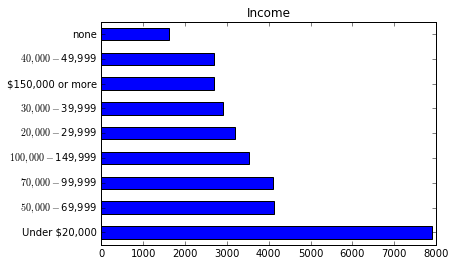

In [40]:
df.Income.value_counts().plot(kind='barh',title="Income")

### Income analysis 

1. categorical or continuous? categorical
2. missing values? None
3. if continuous, Min, Max, Mean, and Standard Deviation?
4. histogram/graph? inline directly above

### Subreddit Exploration

In [41]:
df.Subreddit.value_counts()

askreddit                                        2123
fffffffuuuuuuuuuuuu                              1746
pics                                             1651
trees                                            1311
gaming                                           1207
funny                                            1092
atheism                                           839
askscience                                        779
all                                               647
todayilearned                                     645
starcraft                                         611
iama                                              576
minecraft                                         520
f7u12                                             515
programming                                       501
twoxchromosomes                                   396
science                                           378
truereddit                                        347
wtf                         

In [42]:
df[df.Subreddit.isnull()]

,EntryId,Gender,Age,MaritalStatus,EmploymentStatus,MilitaryService,Children,Education,Country,State,Income,Subreddit,CatOrDog,Cheese
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,NaN,"$70,000 - $99,999",NaN,I like cats.,Munster
13,14,Male,18-24,Forever Alone,Student,No,No,Some college,Romania,NaN,"Under $20,000",NaN,I like cats.,Swiss
29,30,Female,18-24,Forever Alone,Student,No,No,Some college,United States,Minnesota,none,NaN,I like dogs.,American
52,53,Male,25-34,Single,"Not employed, but looking for work",No,No,Bachelor's degree,United States,Texas,"$70,000 - $99,999",NaN,I like cats.,Provolone
61,62,Male,25-34,Single,Employed full time,Yes,No,Some college,romania,NaN,"$20,000 - $29,999",NaN,I like cats.,Other
75,76,Male,35-44,Single,Freelance,No,No,Some college,United Kingdom,NaN,"$70,000 - $99,999",NaN,I like cats.,Other
79,80,Male,25-34,Single,Employed full time,No,No,Bachelor's degree,United States,Texas,"$40,000 - $49,999",NaN,I like cats.,Brie
89,90,Male,18-24,Single,Student,No,No,Some college,United States,Colorado,"$150,000 or more",NaN,I like cats.,Brie
103,104,Male,25-34,In a relationship,Student,No,No,Bachelor's degree,United States,Massachusetts,"$20,000 - $29,999",NaN,I like dogs.,Goat
162,163,Female,25-34,Single,Student,No,No,Bachelor's degree,United States,Florida,"Under $20,000",NaN,I like turtles.,Goat


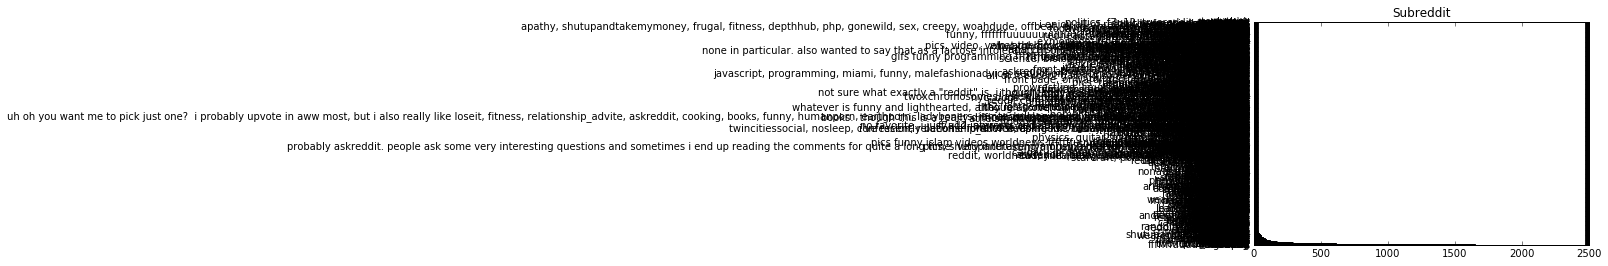

In [43]:
df.Subreddit.value_counts().plot(kind='barh',title="Subreddit")

### Subreddit analysis 

1. categorical or continuous? categorical
2. missing values? Yes, 4335 rows
3. if continuous, Min, Max, Mean, and Standard Deviation?
4. histogram/graph? inline directly above

### CatOrDogExploration

In [44]:
df.CatOrDog.value_counts()

I like dogs.       17149
I like cats.       11152
I like turtles.     4442
none                   5
askreddit              2
 Reddit.com            1
movies                 1
Name: CatOrDog, dtype: int64

In [45]:
df[df.CatOrDog.isnull()]

,EntryId,Gender,Age,MaritalStatus,EmploymentStatus,MilitaryService,Children,Education,Country,State,Income,Subreddit,CatOrDog,Cheese
2705,2706,Male,18-24,Single,"Not employed, but looking for work",No,No,Bachelor's degree,United Kingdom,NaN,none,DROP TABLE `users`,NaN,1
30331,30334,Male,25-34,In a relationship,Employed full time,No,No,Bachelor's degree,Canada,NaN,"$70,000 - $99,999",DROP TABLE USERS,NaN,programming')


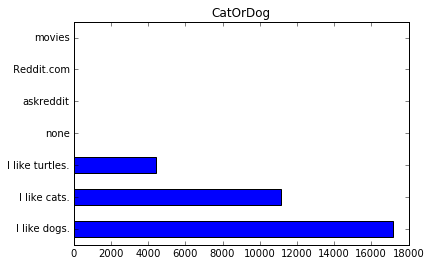

In [46]:
df.CatOrDog.value_counts().plot(kind='barh',title="CatOrDog")

### CatOrDog analysis 

1. categorical or continuous? categorical
2. missing values? Yes, 2 rows
3. if continuous, Min, Max, Mean, and Standard Deviation?
4. histogram/graph? inline directly above

NOTES: If intended as a binary category (Car or Dogs) it contains some invalid responses.

### Cheese Exploration

In [47]:
df.Cheese.value_counts()

Other            6562
Cheddar          6101
Brie             3742
Provolone        3454
Swiss            3214
Feta             2991
Goat             2516
Munster          1770
American         1438
Paneer            618
Limburger         337
none                5
 f7u12              2
1                   1
programming')       1
 awww               1
 Pics               1
Name: Cheese, dtype: int64

In [48]:
df[df.Cheese.isnull()]

,EntryId,Gender,Age,MaritalStatus,EmploymentStatus,MilitaryService,Children,Education,Country,State,Income,Subreddit,CatOrDog,Cheese


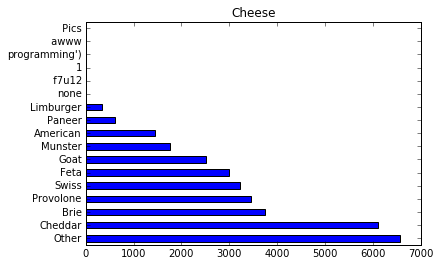

In [49]:
df.Cheese.value_counts().plot(kind='barh',title="Cheese")

### Cheese analysis 

1. categorical or continuous? categorical
2. missing values? No
3. if continuous, Min, Max, Mean, and Standard Deviation?
4. histogram/graph? inline directly above

NOTES: Some limited "bad" (not cheeses) data values

## Clean Survey Data & Create Indicator Variables for Categoricals

In [50]:
#Aggregate all Countries to their Continents
import pycountry

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha2

##### WARNING RUNS VERY SLOW / UNTESTED IN CURRENT STATE #####
# This will do a difflib close match on entered country name to the pycountry list - WARNING RUNS VERY SLOW
#import difflib
#df['Country'] = df['Country'].apply(lambda x: difflib.get_close_matches(x, countries.keys(), 1) or None)

#Useful to check get_close_matches performance
#df[df.Continent.isnull()]

# Convert Country Name to Country Code
df['CountryCode'] = df['Country'].apply(lambda x: countries.get(x) or None)

#If CountryCode is present then convert to continent
from incf.countryutils import transformations
df['Continent'] = df['CountryCode'].apply(lambda x: None if x == None else transformations.cca_to_ctn(x))

#Drop the Country and CountryCode
df = df.drop(['Country', 'CountryCode'], axis=1)

In [51]:
#Drop US States
df = df.drop(['State'], axis=1)

In [52]:
#CatOrDog - Only Allow 'I like cats., 'I like dogs.', or None

def clean_pets(x):
    try:
        if (x == 'I like cats.') or (x == 'I like dogs.'):
            return x
        return None
    except TypeError:
        return None

df["CatOrDog"] = df['CatOrDog'].apply(clean_pets)

#Another Option
#df.CatOrDog.value_counts()

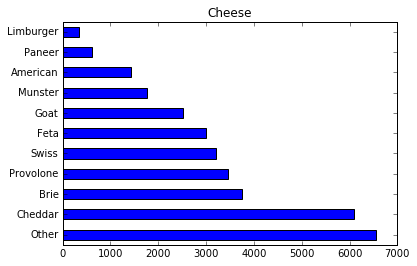

In [53]:
#Cheese - Only allows Cheeses and None

def clean_cheese(x):
    try:
        if x in ['Other', 'Cheddar', 'Brie', 'Provolone', 'Swiss', 'Feta', 'Goat', 'Munster', 'American', 'Paneer', 'Limburger']:
            return x
        return None
    except TypeError:
        return None

df["Cheese"] = df['Cheese'].apply(clean_cheese)

#Quick Visual of the Cleaned Data
df.Cheese.value_counts().plot(kind='barh',title="Cheese")
#Another Option
#df.Cheese.value_counts()

In [54]:
#MilitaryService - Convert to BOOLEAN

d = {'Yes': True, 'No': False}
df['MilitaryService'] = df['MilitaryService'].map(d)

# While NOT ideal, we assume False when NaN as based on overall data shape and we only had 5 NaN out of 32754!
df['MilitaryService'].fillna(False, inplace=True)

df.MilitaryService.value_counts()

False    30531
True      2223
Name: MilitaryService, dtype: int64

In [55]:
# Based on my need to increase speed (laptop) droping this feature - Pearson's Correlation Coefficient time to run.
# This is because given the vast number of categories, it  requires a vast number of columns without smarter binning.

df.drop('Subreddit', axis=1, inplace=True)

In [57]:
#Create indicator variables for categoricals

#NOT converting Military Service as we'll need it to be our depdendent variable later

categorical_variables = ['Gender', 'Age', 'MaritalStatus', 'EmploymentStatus', 'Children', 'Education', 'Continent', 'Income', 'CatOrDog', 'Cheese']

# From Jason Sanchez's Lecture
for variable in categorical_variables:
    # Fill missing data with the word "Missing"
    df[variable].fillna("Missing", inplace=True)
    # Create array of dummies
    dummies = pd.get_dummies(df[variable], prefix=variable)
    # Update X to include dummies and drop the main variable
    df = pd.concat([df, dummies], axis=1)
    df.drop([variable], axis=1, inplace=True)

In [58]:
#Quick Check of the new indicator columns
list(df.columns.values)

['EntryId',
 'MilitaryService',
 'Gender_Female',
 'Gender_Male',
 'Gender_None',
 'Age_18-24',
 'Age_25-34',
 'Age_35-44',
 'Age_45-54',
 'Age_55-64',
 'Age_65 or Above',
 'Age_None',
 'Age_Under 18',
 'MaritalStatus_Blank',
 'MaritalStatus_Engaged',
 'MaritalStatus_Forever Alone',
 'MaritalStatus_In a relationship',
 'MaritalStatus_Married/civil union/domestic partnership',
 'MaritalStatus_Single',
 'MaritalStatus_Widowed',
 'EmploymentStatus_Employed full time',
 'EmploymentStatus_Freelance',
 'EmploymentStatus_None',
 'EmploymentStatus_Not employed and not looking for work',
 'EmploymentStatus_Not employed, but looking for work',
 'EmploymentStatus_Retired',
 'EmploymentStatus_Student',
 'Children_No',
 'Children_None',
 'Children_Yes',
 'Education_Associate degree',
 "Education_Bachelor's degree",
 'Education_Graduate or professional degree',
 'Education_High school graduate or equivalent',
 'Education_None',
 'Education_Some college',
 'Education_Some high school',
 'Education_Tr

In [59]:
# Always good to double check the data
# Look at all the columns in the dataset
def printall(X, max_rows=10):
    from IPython.display import display, HTML
    display(HTML(X.to_html(max_rows=max_rows)))
    
printall(df)

,EntryId,MilitaryService,Gender_Female,Gender_Male,Gender_None,Age_18-24,Age_25-34,Age_35-44,Age_45-54,Age_55-64,Age_65 or Above,Age_None,Age_Under 18,MaritalStatus_Blank,MaritalStatus_Engaged,MaritalStatus_Forever Alone,MaritalStatus_In a relationship,MaritalStatus_Married/civil union/domestic partnership,MaritalStatus_Single,MaritalStatus_Widowed,EmploymentStatus_Employed full time,EmploymentStatus_Freelance,EmploymentStatus_None,EmploymentStatus_Not employed and not looking for work,"EmploymentStatus_Not employed, but looking for work",EmploymentStatus_Retired,EmploymentStatus_Student,Children_No,Children_None,Children_Yes,Education_Associate degree,Education_Bachelor's degree,Education_Graduate or professional degree,Education_High school graduate or equivalent,Education_None,Education_Some college,Education_Some high school,Education_Trade or Vocational degree,Continent_Africa,Continent_Antarctica,Continent_Asia,Continent_Europe,Continent_Missing,Continent_North America,Continent_Oceania,Continent_South America,"Income_$100,000 - $149,999","Income_$150,000 or more","Income_$20,000 - $29,999","Income_$30,000 - $39,999","Income_$40,000 - $49,999","Income_$50,000 - $69,999","Income_$70,000 - $99,999","Income_Under $20,000",Income_none,CatOrDog_I like cats.,CatOrDog_I like dogs.,CatOrDog_Missing,Cheese_American,Cheese_Brie,Cheese_Cheddar,Cheese_Feta,Cheese_Goat,Cheese_Limburger,Cheese_Missing,Cheese_Munster,Cheese_Other,Cheese_Paneer,Cheese_Provolone,Cheese_Swiss
0,1,False,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,False,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3,False,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,False,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,False,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32749,32752,False,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32750,32753,False,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
32751,32754,False,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0

##  Pearson's Correlation Coefficient

Credit to the following page for that starting point for this code: http://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html

NOTE: I had to remove the Subreddit feature for my laptop to generate the Coefficient.

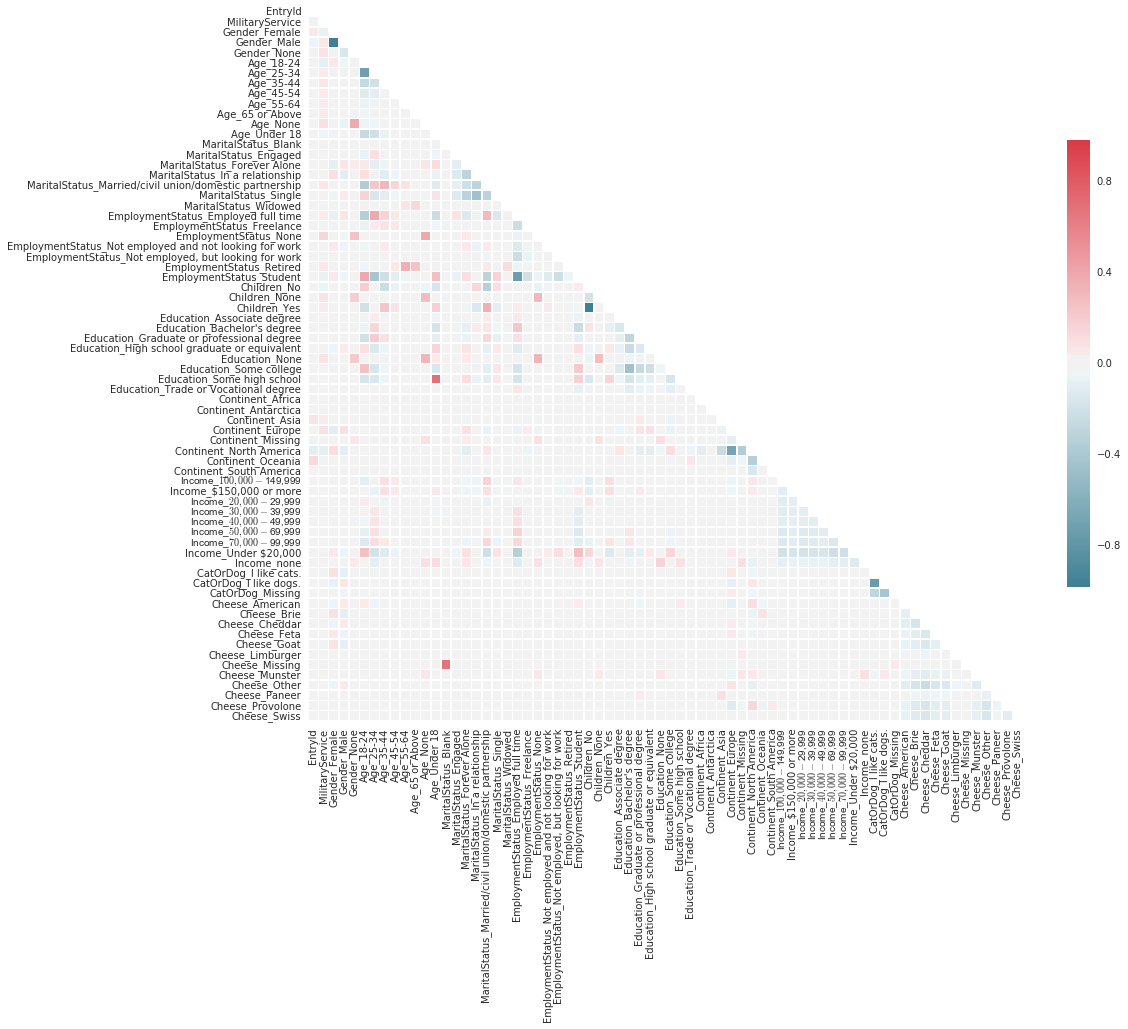

In [73]:
from string import letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
#rs = np.random.RandomState(33)
#d = pd.DataFrame(data=rs.normal(size=(100, 26)),
#                 columns=list(letters[:26]))

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 16))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

### Pearson's Correlation Coefficient Analysis

Perhaps unsurprisingly, the most highly correlated were being Age_Under_18 and having completed some portion of High School.  The next most was Cheese_Missing and MaritalStatus_None, perhaps indication of a correlation for records with missing information in general. 

## Random Forest Model

In [61]:
# Pop our dependent variable
y = df.pop("MilitaryService")

#Quick Check of the Data
#y

In [62]:
#Inital version
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score

model = RandomForestRegressor(n_estimators=100, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=42, 
                              max_features="auto")
model.fit(df, y)
roc = roc_auc_score(y, model.oob_prediction_)
print "C-stat: ", roc

C-stat:  0.663443207573


C:\Users\Andrew\Anaconda2\lib\site-packages\ipykernel\__main__.py:41: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


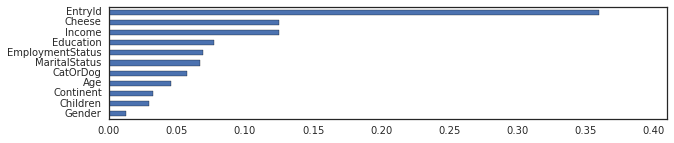

In [63]:
# Check the Feature Importance

def graph_feature_importances(model, feature_names, autoscale=True, headroom=0.05, width=10, summarized_columns=None):
    """
    By Mike Bernico
    
    Graphs the feature importances of a random decision forest using a horizontal bar chart. 
    Probably works but untested on other sklearn.ensembles.
    
    Parameters
    ----------
    ensemble = Name of the ensemble whose features you would like graphed.
    feature_names = A list of the names of those featurs, displayed on the Y axis.
    autoscale = True (Automatically adjust the X axis size to the largest feature +.headroom) / False = scale from 0 to 1
    headroom = used with autoscale, .05 default
    width=figure width in inches
    summarized_columns = a list of column prefixes to summarize on, for dummy variables (e.g. ["day_"] would summarize all day_ vars
    """
    
    if autoscale:
        x_scale = model.feature_importances_.max()+ headroom
    else:
        x_scale = 1
    
    feature_dict=dict(zip(feature_names, model.feature_importances_))
    
    if summarized_columns: 
        #some dummy columns need to be summarized
        for col_name in summarized_columns: 
            #sum all the features that contain col_name, store in temp sum_value
            sum_value = sum(x for i, x in feature_dict.iteritems() if col_name in i )  
            
            #now remove all keys that are part of col_name
            keys_to_remove = [i for i in feature_dict.keys() if col_name in i ]
            for i in keys_to_remove:
                feature_dict.pop(i)
            #lastly, read the summarized field
            feature_dict[col_name] = sum_value
        
    results = pd.Series(feature_dict.values(), index=feature_dict.keys())
    results.sort(axis=1)
    results.plot(kind="barh", figsize=(width,len(results)/4), xlim=(0,x_scale))
    
graph_feature_importances(model, df.columns, summarized_columns=categorical_variables)

30 trees
C-stat:  0.628788895096

50 trees
C-stat:  0.648224344826

100 trees
C-stat:  0.663443207573

200 trees
C-stat:  0.668838445112

500 trees
C-stat:  0.674975559674

1000 trees
C-stat:  0.675238722947



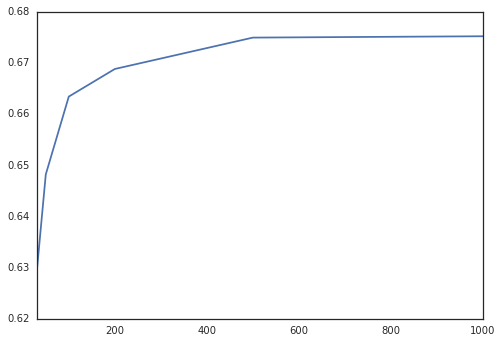

In [65]:
results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(df, y)
    print trees, "trees"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, n_estimator_options).plot();

1 min samples
C-stat:  0.628788895096

2 min samples
C-stat:  0.638771234529

3 min samples
C-stat:  0.65090438598

4 min samples
C-stat:  0.664262106376

5 min samples
C-stat:  0.668134861652

6 min samples
C-stat:  0.672101162844

7 min samples
C-stat:  0.674185546801

8 min samples
C-stat:  0.676323930724

9 min samples
C-stat:  0.678960543529

10 min samples
C-stat:  0.680516309809

15 min samples
C-stat:  0.688844364333

20 min samples
C-stat:  0.690190260077

40 min samples
C-stat:  0.69675063713

80 min samples
C-stat:  0.701809314171



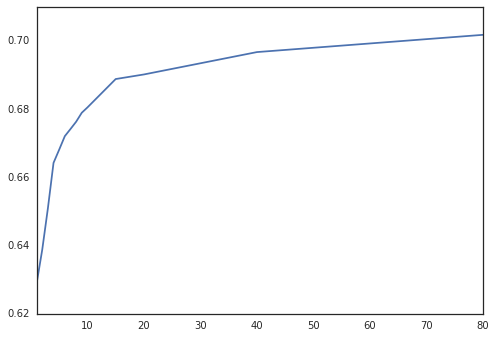

In [68]:
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 40, 80]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=30, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=42, 
                                  max_features="auto", 
                                  min_samples_leaf=min_samples)
    model.fit(df, y)
    print min_samples, "min samples"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, min_samples_leaf_options).plot();

# Final Model

For performance reasons I decided not to push the number of estimators higher, fortunatly the improvment appears to have already been leveling off.

In [69]:
model = RandomForestRegressor(n_estimators=1000, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=42, 
                              max_features="auto",
                              min_samples_leaf=80)
model.fit(df, y)

roc = roc_auc_score(y, model.oob_prediction_)
print "Final Model C-stat: ", roc

Final Model C-stat:  0.710529601463
